In [1]:
# getting started - easier

import numpy as np
from time import perf_counter, sleep
import matplotlib.pyplot as plt
from tqdm import tqdm

from board import board_obj
from operations import ops
import vis_tools

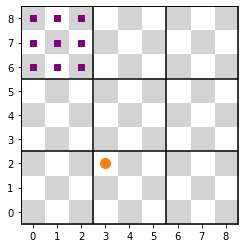

In [2]:
# initialize a board, a container that holds the game information
some_board = board_obj()

# perform an operation on the board, specifically making a move at (3,2)
ops.make_move(some_board, (3,2))

# visualize
vis_tools.fancy_draw_board(some_board)
vis_tools.add_valid_moves(some_board)

---
## The engine, briefly

The "board object" contains static information, including game history.<br>
"Operations" are applied to update that board based on agent requests.

You will have access to the operations library which may simplify your design. This was recently rewritten to include 'move' and 'undo' functions that should help with tree searches.

---
## Build a bot

You need to build a bot. This will be a python class with some required functions.<br>
You will have access to the following libraries: 
- xyz
- abc
- hij

---
Below is an example bot:

In [3]:
class template_bot:
    '''
    this bot selects a random valid move
    '''
    def __init__(self, name = 'beep-boop'):
        self.name = name
    def move(self, board_dict):
        random_index = np.random.choice(len(board_dict['valid_moves']))
        return board_dict['valid_moves'][random_index]

All bots will have a "move" method that takes a dictionary as input.<br>
Let's take a look at that dictionary using the "ops" library:

In [4]:
ops.pull_dictionary(some_board)

{'board_state': array([[-0., -0., -0., -0., -0., -0., -0., -0., -0.],
        [-0., -0., -0., -0., -0., -0., -0., -0., -0.],
        [-0., -0., -0., -0., -0., -0., -0., -0., -0.],
        [-0., -0., -1., -0., -0., -0., -0., -0., -0.],
        [-0., -0., -0., -0., -0., -0., -0., -0., -0.],
        [-0., -0., -0., -0., -0., -0., -0., -0., -0.],
        [-0., -0., -0., -0., -0., -0., -0., -0., -0.],
        [-0., -0., -0., -0., -0., -0., -0., -0., -0.],
        [-0., -0., -0., -0., -0., -0., -0., -0., -0.]]),
 'active_box': (0, 2),
 'valid_moves': [(0, 6),
  (0, 7),
  (0, 8),
  (1, 6),
  (1, 7),
  (1, 8),
  (2, 6),
  (2, 7),
  (2, 8)]}

There are 3 keys:<br>
- The "board_state" is are the locations of each placed marker. Your markers are +1, your opponent is -1.
- The "active_box" identifies which miniboard the current player plays on.
- "valid_moves" is a list of the valid positions that can be returned.


In [5]:
class your_bot:
    '''
    this bot selects a random valid move
    '''
    def __init__(self, name = 'version 0.1'):
        self.name = name
    def move(self, board_dict):
        
        ''' ---  some intentionally bad logic ----'''
        sleep(0.1)
        
        return tuple(np.random.randint(9,size=2))

In [6]:
''' define bots '''
agent1 = your_bot()
agent2 = template_bot()

''' track time to calculate turn '''
agent1_times = list()
agent2_times = list()

win_counter = 0 # quick integer check to see whether line bot wins more than loses

for game_index in tqdm(range(10)):
    my_board = board_obj()
    for i in range(81): # up to 81 moves per game.
        ''' ------ agent 1 turn ------'''
        # get dictionary 
        temp_dict = ops.pull_dictionary(my_board)
        # give dict to agent, calculate move
        start = perf_counter()
        agent1_move = agent1.move(temp_dict)
        agent1_times.append(perf_counter()-start)
        # validate the move
        if not ops.check_move_is_valid(my_board, agent1_move):
            raise Exception(f'invalid move selected by p1, {agent1_move}')

        # make the move
        ops.make_move(my_board, agent1_move)
        # check whether game is finished
        if ops.check_game_finished(my_board):
            win_counter += 1
            break

        ''' agent 2 turn '''
        # get dictionary 
        temp_dict = ops.pull_dictionary(my_board)
        # give dict to agent, calculate move
        start = perf_counter()
        agent2_move = agent2.move(temp_dict)
        agent2_times.append(perf_counter()-start)

        # validate the move
        if not ops.check_move_is_valid(my_board, agent2_move):
            raise Exception(f'invalid move selected by p2, {agent2_move}')
        # make the move
        ops.make_move(my_board, agent2_move)
        # check whether game is finished
        if ops.check_game_finished(my_board):
            win_counter -= 1
            break

print(win_counter)

  0%|                                                    | 0/10 [00:00<?, ?it/s]


Exception: invalid move selected by p1, (6, 5)

---
## Debugging
Inevitably you'll run into errors.<br>
You can narrow down the source of the error by investigating the state of the board and the action your bot wants to make.
Pull the information about the board with:

In [7]:
print('agent1 move:', agent1_move, '\n')

print('valid moves:', ops.get_valid_moves(my_board), '\n')

print('dict:',ops.pull_dictionary(my_board), '\n')


agent1 move: (6, 5) 

valid moves: [(3, 6), (3, 7), (3, 8), (4, 6), (4, 7), (5, 6), (5, 7), (5, 8)] 

dict: {'board_state': array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]), 'active_box': (1, 2), 'valid_moves': [(3, 6), (3, 7), (3, 8), (4, 6), (4, 7), (5, 6), (5, 7), (5, 8)]} 



And visualize the board with:

selected moved given this board: (2, 8)


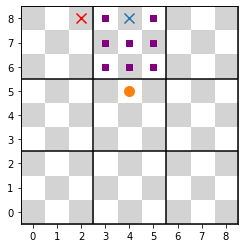

In [8]:
# visualize the game state
vis_tools.fancy_draw_board(my_board)
vis_tools.add_valid_moves(my_board)

# using this info, see what move your agent wants to make
selected_move = agent1.move(ops.pull_dictionary(my_board))
print('selected moved given this board:', selected_move)
plt.scatter(selected_move[0],selected_move[1],c='r',s=100,marker='x');

---
## Evaluation and timing
Once you get a bot up and running, take a look at how long you have to calculate moves with the "times" list.
The win_counter is a quick and dirty way to evaluate your bot against some opponent.


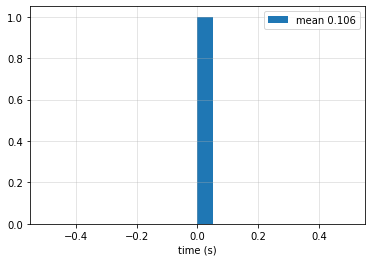

In [9]:

''' plot the times your bot took to execute a move '''
# the mean must be below 0.5 seconds

plt.hist(agent2_times,bins=20,label=f'mean {np.round(np.mean(agent1_times),4)}')
plt.xlabel('time (s)')
plt.grid(alpha=0.4)
plt.legend();


---
## Try to beat a decent bot


In [11]:
from line_completer import line_completer_bot

''' define bots '''
agent1 = line_completer_bot()
agent2 = your_bot()

''' track time to calculate turn '''
agent1_times = list()
agent2_times = list()

win_counter = 0 # quick integer check to see whether line bot wins more than loses

for game_index in tqdm(range(100)):
    my_board = board_obj()
    for i in range(81): # up to 81 moves per game.
        ''' ------ agent 1 turn ------'''
        # get dictionary 
        temp_dict = ops.pull_dictionary(my_board)
        # give dict to agent, calculate move
        start = perf_counter()
        agent1_move = agent1.move(temp_dict)
        agent1_times.append(perf_counter()-start)
        # validate the move
        if not ops.check_move_is_valid(my_board, agent1_move):
            raise Exception(f'invalid move selected by p1, {agent1_move}')

        # make the move
        ops.make_move(my_board, agent1_move)
        # check whether game is finished
        if ops.check_game_finished(my_board):
            win_counter += 1
            break

        ''' agent 2 turn '''
        # get dictionary 
        temp_dict = ops.pull_dictionary(my_board)
        # give dict to agent, calculate move
        start = perf_counter()
        agent2_move = agent2.move(temp_dict)
        agent2_times.append(perf_counter()-start)

        # validate the move
        if not ops.check_move_is_valid(my_board, agent2_move):
            raise Exception(f'invalid move selected by p2, {agent2_move}')
        # make the move
        ops.make_move(my_board, agent2_move)
        # check whether game is finished
        if ops.check_game_finished(my_board):
            win_counter -= 1
            break

print(win_counter)

100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.01it/s]

96
